In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who', 'deck']].dropna()
print(titanic.head())

    survived  pclass     sex   age  sibsp  parch     fare embarked    who deck
1          1       1  female  38.0      1      0  71.2833        C  woman    C
3          1       1  female  35.0      1      0  53.1000        S  woman    C
6          0       1    male  54.0      0      0  51.8625        S    man    E
10         1       3  female   4.0      1      1  16.7000        S  child    G
11         1       1  female  58.0      0      0  26.5500        S  woman    C



Measures of Central Tendency for Numerical Features:
              age        fare     sibsp     parch
mean    35.623187   78.919735  0.467033  0.478022
median  36.000000   57.000000  0.000000  0.000000
min      0.920000    0.000000  0.000000  0.000000
max     80.000000  512.329200  3.000000  4.000000
std     15.671615   76.490774  0.645007  0.755869

Mode for Categorical Features:
pclass: 1
sex: male
embarked: S
who: man
deck: C


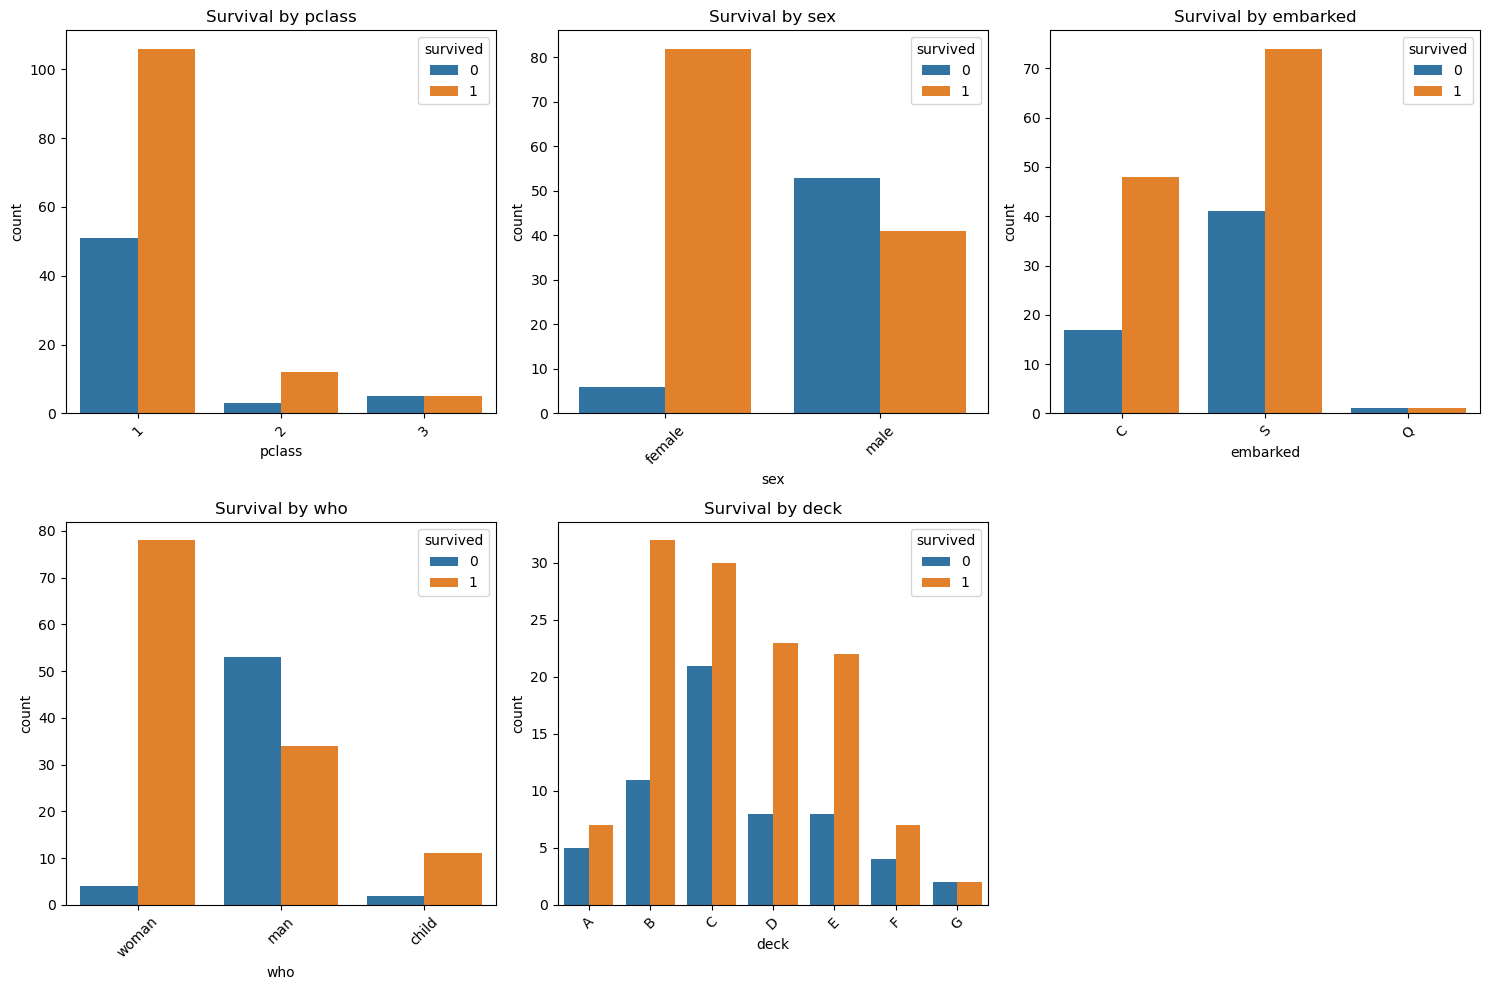

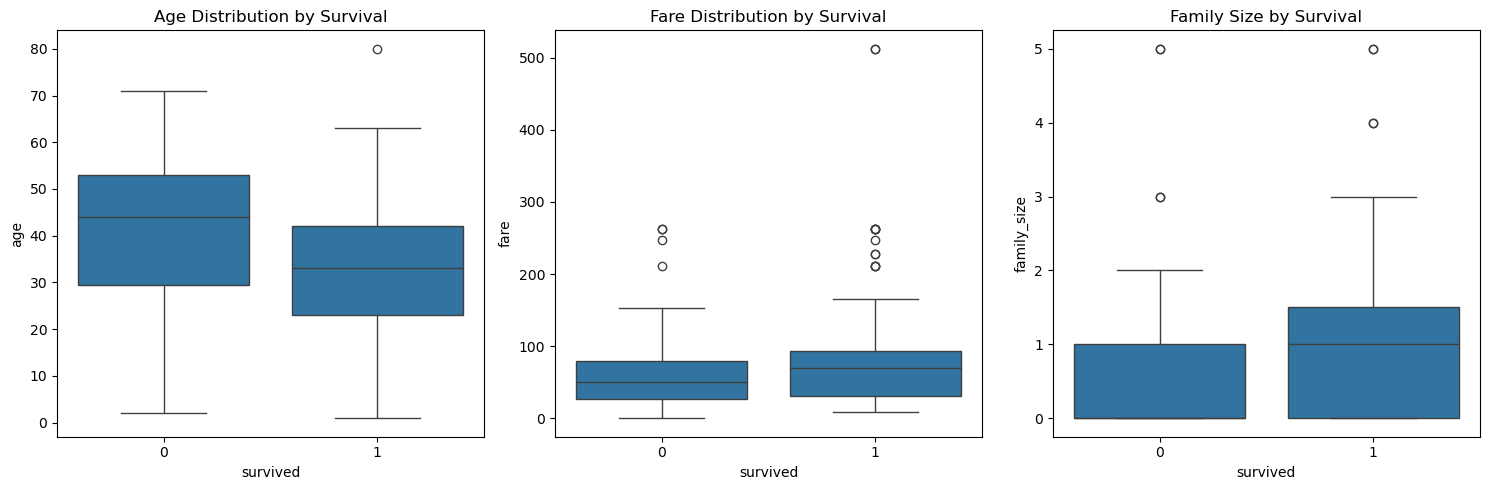

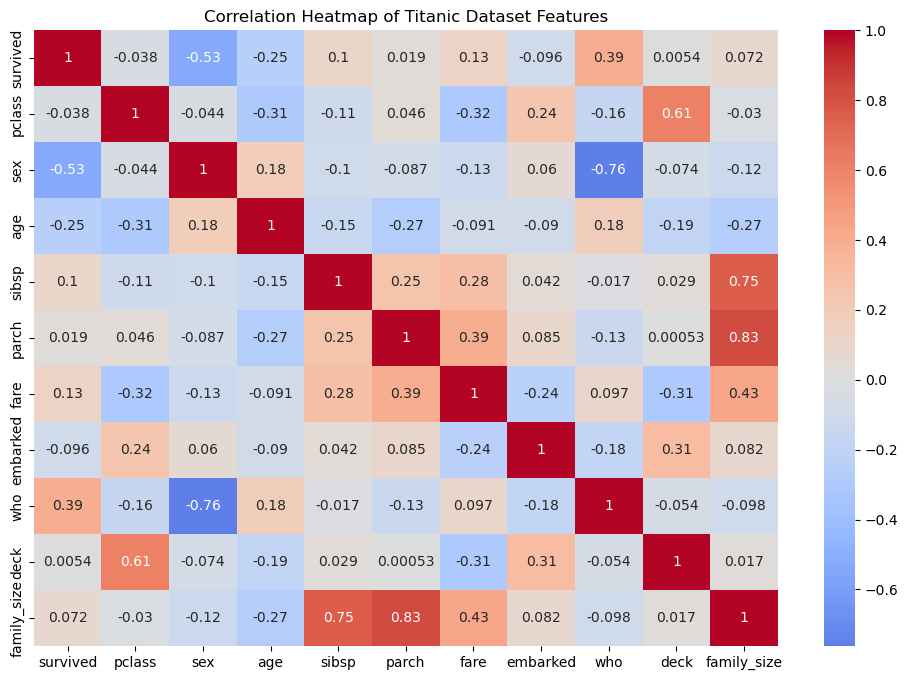

In [3]:
numerical_features = ['age', 'fare', 'sibsp', 'parch']
central_tendency = titanic[numerical_features].agg(['mean', 'median', 'min', 'max', 'std'])
print("\nMeasures of Central Tendency for Numerical Features:")
print(central_tendency)
categorical_features = ['pclass', 'sex', 'embarked', 'who', 'deck']
print("\nMode for Categorical Features:")
for feature in categorical_features:
    print(f"{feature}: {titanic[feature].mode()[0]}")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=titanic, x=feature, hue='survived')
    plt.title(f'Survival by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=titanic, x='survived', y='age')
plt.title('Age Distribution by Survival')
plt.subplot(1, 3, 2)
sns.boxplot(data=titanic, x='survived', y='fare')
plt.title('Fare Distribution by Survival')
plt.subplot(1, 3, 3)
titanic['family_size'] = titanic['sibsp'] + titanic['parch']
sns.boxplot(data=titanic, x='survived', y='family_size')
plt.title('Family Size by Survival')
plt.tight_layout()
plt.show()
titanic_corr = titanic.copy()
le = LabelEncoder()
for feature in categorical_features:
    titanic_corr[feature] = le.fit_transform(titanic_corr[feature])
corr_matrix = titanic_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()
